In [1]:
import pandas as pd
import os 

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from src.preprocess.submodule.get_features import get_df_feat
from src.preprocess.submodule.train_test_split import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, recall_score, precision_score, roc_curve
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [24]:
df_fan = pd.read_pickle("tmp/data/df_meta_5050.pkl")

In [6]:
df_fan.head()

,filename,label,type,model
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0


In [7]:
# df_fan = get_df_feat(df_fan, n_fft = 2048, sr = 16000)
# df_fan_means = get_df_feat(df_fan, n_fft = 2048, sr = 16000, means = True)

  0%|          | 0/5550 [00:00<?, ?it/s]

100%|██████████| 5550/5550 [09:35<00:00,  9.65it/s]


In [8]:
df_fan.head()

,filename,label,type,model,lmfe2_1,lmfe2_2,lmfe2_3,lmfe2_4,lmfe2_5,lmfe2_6,...,chroma12_54,chroma12_55,chroma12_56,chroma12_57,chroma12_58,chroma12_59,chroma12_60,chroma12_61,chroma12_62,chroma12_63
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.618336,-5.220507,-5.994688,-6.230031,-5.380135,-5.783137,...,0.200693,0.195908,0.195140,0.199853,0.208105,0.215335,0.217623,0.217362,0.218532,0.219081
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.316121,-6.926745,-6.444106,-5.439939,-6.327365,-5.941133,...,0.180614,0.186579,0.202190,0.217893,0.222677,0.211637,0.191669,0.170347,0.152632,0.140711
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.122645,-5.816721,-5.276961,-5.526385,-6.544883,-5.008793,...,0.231989,0.230195,0.228884,0.227044,0.226092,0.226564,0.227527,0.227834,0.227415,0.226468
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-5.692640,-7.837812,-6.377843,-8.133315,-7.944658,-7.229972,...,0.291082,0.278178,0.271414,0.263213,0.261781,0.280700,0.314011,0.345527,0.369576,0.383844
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-7.419948,-6.877067,-6.689786,-6.643802,-6.929425,-5.464506,...,0.231546,0.233453,0.236400,0.239356,0.241495,0.241205,0.238353,0.234314,0.230251,0.226833


In [9]:
df_fan.columns = df_fan.columns.str.replace('_', ' ').astype('str')

In [26]:
df_fan.head()

,filename,label,type,model
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0


In [11]:
df_fan_means.head()

,filename,label,type,model,lmfe2_1,lmfe2_2,lmfe2_3,lmfe2_4,lmfe2_5,lmfe2_6,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.618336,-5.220507,-5.994688,-6.230031,-5.380135,-5.783137,...,0.224180,0.204391,0.216584,0.198964,0.208309,0.242770,0.419827,0.357053,0.314537,0.176287
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.316121,-6.926745,-6.444106,-5.439939,-6.327365,-5.941133,...,0.377706,0.217962,0.212986,0.246425,0.215229,0.321905,0.238498,0.196942,0.197340,0.180871
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.122645,-5.816721,-5.276961,-5.526385,-6.544883,-5.008793,...,0.428652,0.220574,0.220208,0.199093,0.317233,0.258903,0.229704,0.214970,0.180478,0.216964
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-5.692640,-7.837812,-6.377843,-8.133315,-7.944658,-7.229972,...,0.237153,0.234928,0.266893,0.188513,0.210425,0.175070,0.216226,0.236968,0.238947,0.371682
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-7.419948,-6.877067,-6.689786,-6.643802,-6.929425,-5.464506,...,0.413254,0.238172,0.229295,0.229615,0.216063,0.274449,0.238989,0.226922,0.194660,0.217534


In [12]:
df_fan_means.columns = df_fan_means.columns.str.replace('_', ' ').astype('str')

In [13]:
df_fan_means.head()

,filename,label,type,model,lmfe2 1,lmfe2 2,lmfe2 3,lmfe2 4,lmfe2 5,lmfe2 6,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.618336,-5.220507,-5.994688,-6.230031,-5.380135,-5.783137,...,0.224180,0.204391,0.216584,0.198964,0.208309,0.242770,0.419827,0.357053,0.314537,0.176287
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.316121,-6.926745,-6.444106,-5.439939,-6.327365,-5.941133,...,0.377706,0.217962,0.212986,0.246425,0.215229,0.321905,0.238498,0.196942,0.197340,0.180871
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.122645,-5.816721,-5.276961,-5.526385,-6.544883,-5.008793,...,0.428652,0.220574,0.220208,0.199093,0.317233,0.258903,0.229704,0.214970,0.180478,0.216964
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-5.692640,-7.837812,-6.377843,-8.133315,-7.944658,-7.229972,...,0.237153,0.234928,0.266893,0.188513,0.210425,0.175070,0.216226,0.236968,0.238947,0.371682
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-7.419948,-6.877067,-6.689786,-6.643802,-6.929425,-5.464506,...,0.413254,0.238172,0.229295,0.229615,0.216063,0.274449,0.238989,0.226922,0.194660,0.217534


In [2]:
# df_fan.to_pickle("tmp/data/df_meta_5050_feat.pkl")
# df_fan_means.to_pickle("tmp/data/df_meta_5050_feat_means.pkl")

df_fan = pd.read_pickle("tmp/data/df_meta_5050_feat.pkl")
df_fan_means = pd.read_pickle("tmp/data/df_meta_5050_feat_means.pkl")

In [3]:
df_fan.head()

,filename,label,type,model,lmfe2 1,lmfe2 2,lmfe2 3,lmfe2 4,lmfe2 5,lmfe2 6,...,chroma12 54,chroma12 55,chroma12 56,chroma12 57,chroma12 58,chroma12 59,chroma12 60,chroma12 61,chroma12 62,chroma12 63
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.618336,-5.220507,-5.994688,-6.230031,-5.380135,-5.783137,...,0.200693,0.195908,0.195140,0.199853,0.208105,0.215335,0.217623,0.217362,0.218532,0.219081
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.316121,-6.926745,-6.444106,-5.439939,-6.327365,-5.941133,...,0.180614,0.186579,0.202190,0.217893,0.222677,0.211637,0.191669,0.170347,0.152632,0.140711
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.122645,-5.816721,-5.276961,-5.526385,-6.544883,-5.008793,...,0.231989,0.230195,0.228884,0.227044,0.226092,0.226564,0.227527,0.227834,0.227415,0.226468
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-5.692640,-7.837812,-6.377843,-8.133315,-7.944658,-7.229972,...,0.291082,0.278178,0.271414,0.263213,0.261781,0.280700,0.314011,0.345527,0.369576,0.383844
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-7.419948,-6.877067,-6.689786,-6.643802,-6.929425,-5.464506,...,0.231546,0.233453,0.236400,0.239356,0.241495,0.241205,0.238353,0.234314,0.230251,0.226833


In [3]:
from src.preprocess.pd_preprocess import remove_underbar_in_column

df_fan = remove_underbar_in_column(df_fan)
df_fan_means = remove_underbar_in_column(df_fan_means)

In [16]:
df_fan.head()

,filename,label,type,model,lmfe2 1,lmfe2 2,lmfe2 3,lmfe2 4,lmfe2 5,lmfe2 6,...,chroma12 54,chroma12 55,chroma12 56,chroma12 57,chroma12 58,chroma12 59,chroma12 60,chroma12 61,chroma12 62,chroma12 63
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.618336,-5.220507,-5.994688,-6.230031,-5.380135,-5.783137,...,0.200693,0.195908,0.195140,0.199853,0.208105,0.215335,0.217623,0.217362,0.218532,0.219081
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.316121,-6.926745,-6.444106,-5.439939,-6.327365,-5.941133,...,0.180614,0.186579,0.202190,0.217893,0.222677,0.211637,0.191669,0.170347,0.152632,0.140711
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.122645,-5.816721,-5.276961,-5.526385,-6.544883,-5.008793,...,0.231989,0.230195,0.228884,0.227044,0.226092,0.226564,0.227527,0.227834,0.227415,0.226468
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-5.692640,-7.837812,-6.377843,-8.133315,-7.944658,-7.229972,...,0.291082,0.278178,0.271414,0.263213,0.261781,0.280700,0.314011,0.345527,0.369576,0.383844
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-7.419948,-6.877067,-6.689786,-6.643802,-6.929425,-5.464506,...,0.231546,0.233453,0.236400,0.239356,0.241495,0.241205,0.238353,0.234314,0.230251,0.226833


In [17]:
df_fan_means.head()

,filename,label,type,model,lmfe2 1,lmfe2 2,lmfe2 3,lmfe2 4,lmfe2 5,lmfe2 6,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.618336,-5.220507,-5.994688,-6.230031,-5.380135,-5.783137,...,0.224180,0.204391,0.216584,0.198964,0.208309,0.242770,0.419827,0.357053,0.314537,0.176287
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.316121,-6.926745,-6.444106,-5.439939,-6.327365,-5.941133,...,0.377706,0.217962,0.212986,0.246425,0.215229,0.321905,0.238498,0.196942,0.197340,0.180871
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-6.122645,-5.816721,-5.276961,-5.526385,-6.544883,-5.008793,...,0.428652,0.220574,0.220208,0.199093,0.317233,0.258903,0.229704,0.214970,0.180478,0.216964
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-5.692640,-7.837812,-6.377843,-8.133315,-7.944658,-7.229972,...,0.237153,0.234928,0.266893,0.188513,0.210425,0.175070,0.216226,0.236968,0.238947,0.371682
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,-7.419948,-6.877067,-6.689786,-6.643802,-6.929425,-5.464506,...,0.413254,0.238172,0.229295,0.229615,0.216063,0.274449,0.238989,0.226922,0.194660,0.217534


In [5]:
df_fan = train_test_split(df_fan)
df_fan_means = train_test_split(df_fan_means)

In [2]:
# df_fan.to_pickle("tmp/data/df_meta_5050_feat_train_test.pkl")
# df_fan_means.to_pickle("tmp/data/df_meta_5050_feat_means_train_test.pkl")

df_fan = pd.read_pickle("tmp/data/df_meta_5050_feat_train_test.pkl")
df_fan_means = pd.read_pickle("tmp/data/df_meta_5050_feat_means_train_test.pkl")

In [3]:
from src.preprocess.submodule.train_test_split import get_train_test_vector_all_feat

In [4]:
result_tuple = get_train_test_vector_all_feat(df_fan)
result_tuple_means = get_train_test_vector_all_feat(df_fan_means)

In [9]:
train_mel

,lmfe2 1,lmfe2 2,lmfe2 3,lmfe2 4,lmfe2 5,lmfe2 6,lmfe2 7,lmfe2 8,lmfe2 9,lmfe2 10,...,chroma12 60,chroma12 61,chroma12 62,chroma12 63,filename,label,type,model,train,test
0,-6.618336,-5.220507,-5.994688,-6.230031,-5.380135,-5.783137,-5.892226,-5.989779,-6.421953,-6.813910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-6.122645,-5.816721,-5.276961,-5.526385,-6.544883,-5.008793,-4.574164,-5.444547,-6.552645,-7.354203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-5.692640,-7.837812,-6.377843,-8.133315,-7.944658,-7.229972,-7.301760,-7.170941,-7.855827,-8.361450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-5.754778,-7.982905,-5.971991,-6.285884,-7.293037,-7.117966,-7.572159,-7.145557,-7.703592,-7.480045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-5.600637,-6.049098,-6.388765,-6.904849,-6.098921,-6.643138,-6.040185,-7.273769,-6.489091,-6.555889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,-5.710318,-5.251946,-6.222824,-5.785078,-6.508377,-6.935003,-4.524679,-5.816798,-6.985971,-6.311833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3256,-9.072685,-4.711518,-6.466269,-7.189536,-7.666912,-7.494058,-4.469173,-5.298744,-6.958004,-7.722541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3257,-7.862961,-8.297442,-7.254546,-7.199129,-7.803446,-8.255792,-5.063055,-6.114060,-7.371529,-5.310086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,-6.124933,-6.973846,-5.609328,-6.425456,-7.622773,-5.712704,-4.529393,-5.915628,-6.225975,-6.516406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# df_fan = train_test_split(df_fan)
# df_fan_means = train_test_split(df_fan_means)

In [23]:
# df_fan.columns

Index(['filename', 'label', 'type', 'model', 'lmfe2 1', 'lmfe2 2', 'lmfe2 3',
       'lmfe2 4', 'lmfe2 5', 'lmfe2 6',
       ...
       'chroma12 56', 'chroma12 57', 'chroma12 58', 'chroma12 59',
       'chroma12 60', 'chroma12 61', 'chroma12 62', 'chroma12 63', 'train',
       'test'],
      dtype='object', length=3138)

In [5]:
train_mel, test_mel, train_chroma, test_chroma, y = result_tuple
train_mel_means, test_mel_means, train_chroma_means, test_chroma_means, y_means = result_tuple_means

In [6]:
train_mel.head()

,lmfe2 1,lmfe2 2,lmfe2 3,lmfe2 4,lmfe2 5,lmfe2 6,lmfe2 7,lmfe2 8,lmfe2 9,lmfe2 10,...,mfcc13 125,mfcc13 126,mfcc13 127,mfcc13 128,mfcc13 129,mfcc13 130,mfcc13 131,mfcc13 132,mfcc13 133,mfcc13 134
0,-6.618336,-5.220507,-5.994688,-6.230031,-5.380135,-5.783137,-5.892226,-5.989779,-6.421953,-6.813910,...,-0.097865,0.379212,-0.415520,0.270139,-0.033462,0.755548,-0.813021,-0.076362,0.340483,-0.726360
2,-6.122645,-5.816721,-5.276961,-5.526385,-6.544883,-5.008793,-4.574164,-5.444547,-6.552645,-7.354203,...,-0.000431,-0.532768,-0.205460,0.521847,0.330957,1.195503,-0.050131,1.067607,0.207857,-0.318668
3,-5.692640,-7.837812,-6.377843,-8.133315,-7.944658,-7.229972,-7.301760,-7.170941,-7.855827,-8.361450,...,0.392526,0.313854,0.703300,0.231210,0.653351,0.733686,0.251066,0.462864,-0.466831,0.572042
5,-5.754778,-7.982905,-5.971991,-6.285884,-7.293037,-7.117966,-7.572159,-7.145557,-7.703592,-7.480045,...,-0.196973,0.276910,0.522263,-0.116176,-0.111883,-0.184652,-0.436485,0.042595,-0.305665,0.665792
6,-5.600637,-6.049098,-6.388765,-6.904849,-6.098921,-6.643138,-6.040185,-7.273769,-6.489091,-6.555889,...,-0.068210,-0.045642,-0.127617,0.137253,1.007464,0.325211,0.187894,-0.294644,0.121918,1.132778


In [15]:
def classify_anomalies(train_data, test_data, test_labels, machine, feat_label):
    scaler = MinMaxScaler((-5, 5))
    
    # LOF without PCA
    lof = LocalOutlierFactor(novelty=True, contamination=0.0001)
    lof_pipe = Pipeline([("scaler", scaler), ("classifier", lof)])
    
    # LOF with PCA
    pca_lof = PCA(0.9)
    lof_pca_pipe = Pipeline([("scaler", scaler), ("pca", pca_lof), ("classifier", lof)])
    
    # Isolation Forest without PCA
    isolation_forest = IsolationForest(contamination=0.0001)
    isolation_forest_pipe = Pipeline([("scaler", scaler), ("classifier", isolation_forest)])
    
    # Isolation Forest with PCA
    pca_if = PCA(0.9)
    isolation_forest_pca_pipe = Pipeline([("scaler", scaler), ("pca", pca_if), ("classifier", isolation_forest)])

    models = {
        "LOF": lof_pipe,
        "LOF + PCA": lof_pca_pipe,
        "Isolation Forest": isolation_forest_pipe,
        "Isolation Forest + PCA": isolation_forest_pca_pipe,
    }

    results = {
        "Machine": machine,
        "Features": feat_label,
        "Model": [],
        "AUC": [],
        "Recall": [],
        "Precision": [],
        "Abnormal (-1) F1": [],
    }
    fig, axes = plt.subplots(ncols=len(models), nrows=1, figsize=(16, 4))

    for i, (model_name, model) in enumerate(models.items()):
        roc_ax = axes[i]
        model.fit(train_data)
        scores = model.decision_function(test_data)
        auc = roc_auc_score(test_labels, scores)  # Use -scores because higher score should be less anomalous
        fpr, tpr, thresholds = roc_curve(test_labels, scores)
        # Plot the ROC curve
        roc_ax.plot(fpr, tpr)
        roc_ax.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.7)  # Diagonal line for reference
        roc_ax.set_title(f'{model_name}\n ROC Curve\n AUC = {auc:.2f}')
        roc_ax.set_xlabel('False Positive Rate')
        roc_ax.set_ylabel('True Positive Rate')
        roc_ax.legend(['ROC curve', 'Random'], fontsize="9", loc='lower right')

        # Sort scores in ascending order and find the threshold for 85% correctly classified normal data
        sorted_scores = np.sort(thresholds)
        threshold_index = int(0.85 * len(sorted_scores))
        threshold = sorted_scores[threshold_index]

        # Make predictions based on the threshold
        predictions = np.where(scores >= threshold, 1, -1)
        recall = recall_score(test_labels, predictions, average='weighted')
        precision = precision_score(test_labels, predictions, average='weighted')
        abf1 = metrics.f1_score(test_labels, predictions, pos_label= -1, average='binary')

        results["Model"].append(model_name)
        results["AUC"].append(auc)
        results["Recall"].append(recall)
        results["Precision"].append(precision)
        results["Abnormal (-1) F1"].append(abf1)

    results_df = pd.DataFrame(results)
    print(f"{feat_label} features were reduced to {pca_lof.n_components_} components for LOF")
    print(f"{feat_label} features were reduced to {pca_if.n_components_} components for Isolation Forest")
    return results_df


mel features were reduced to 572 components for LOF
mel features were reduced to 572 components for Isolation Forest


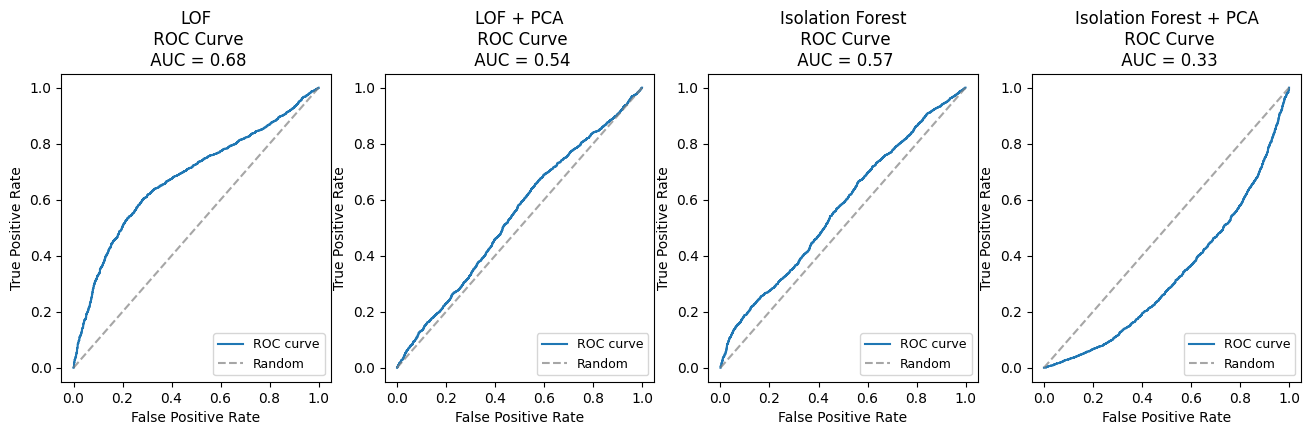

In [21]:
result_df_mel = classify_anomalies(train_mel, test_mel, y, "fan", "mel")

chroma features were reduced to 70 components for LOF
chroma features were reduced to 70 components for Isolation Forest


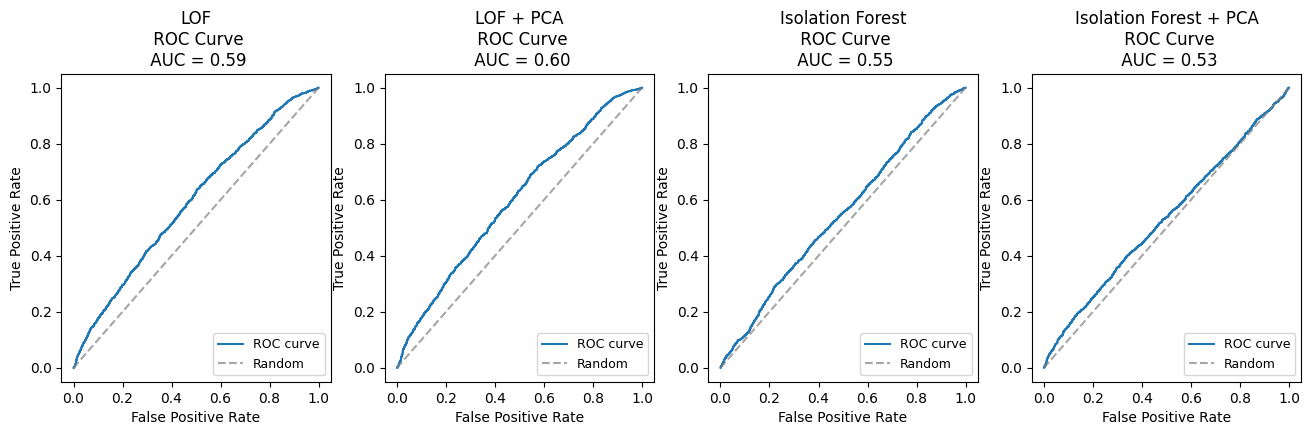

In [20]:
result_df_chroma = classify_anomalies(train_chroma, test_chroma, y, "fan", "chroma")

mel means features were reduced to 556 components for LOF
mel means features were reduced to 556 components for Isolation Forest


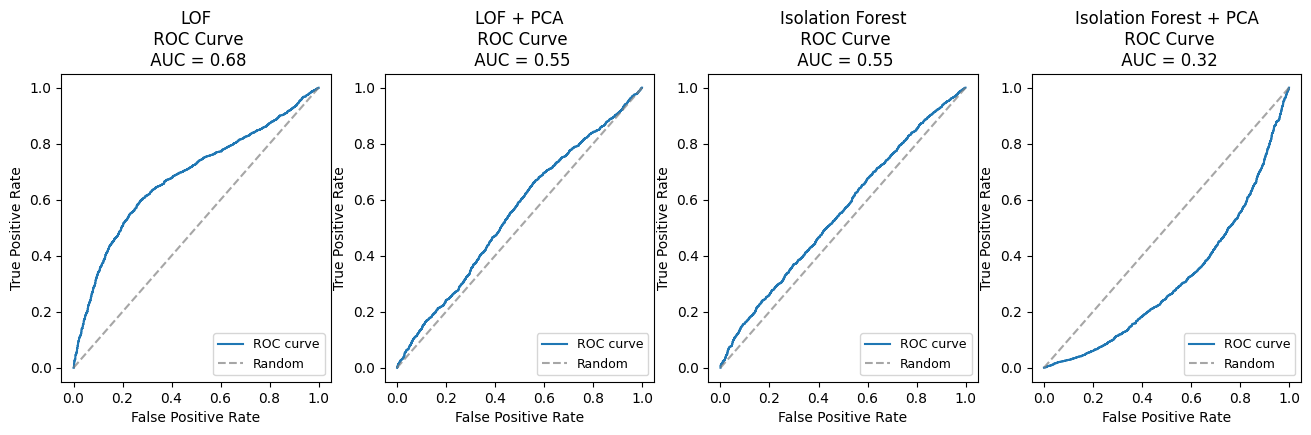

In [22]:
result_df_mel_means = classify_anomalies(train_mel_means, test_mel_means, y_means, "fan", "mel means")

chroma means features were reduced to 69 components for LOF
chroma means features were reduced to 69 components for Isolation Forest


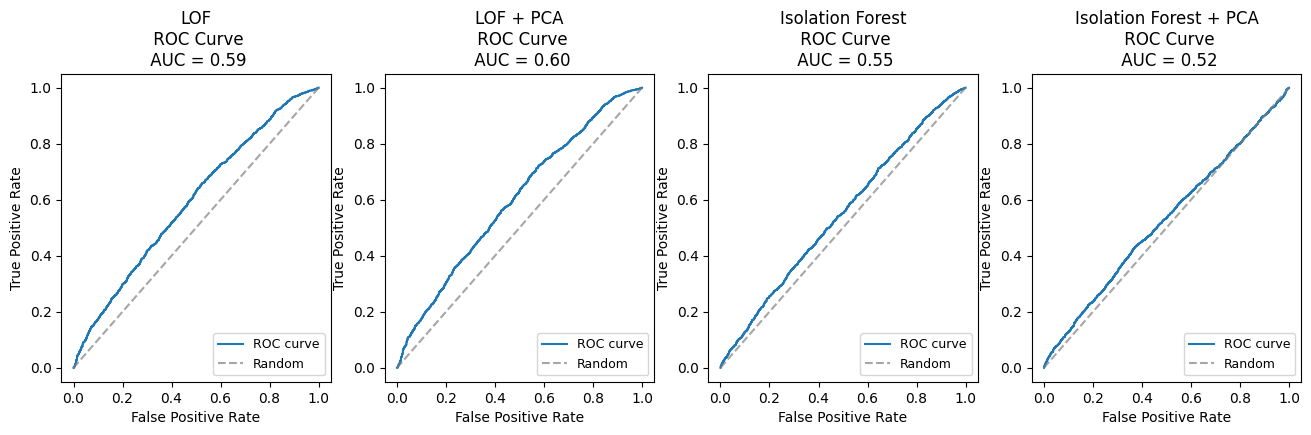

In [23]:
result_df_chroma_means = classify_anomalies(train_chroma_means, test_chroma_means, y_means, "fan", "chroma means")

In [27]:
result_df_mel

,Machine,Features,Model,AUC,Recall,Precision,Abnormal (-1) F1
0,fan,mel,LOF,0.677425,0.484324,0.746624,0.479826
1,fan,mel,LOF + PCA,0.542644,0.357838,0.640034,0.414586
2,fan,mel,Isolation Forest,0.568292,0.392973,0.680434,0.431968
3,fan,mel,Isolation Forest + PCA,0.331299,0.261261,0.414224,0.361967


In [28]:
result_df_mel_means

,Machine,Features,Model,AUC,Recall,Precision,Abnormal (-1) F1
0,fan,mel means,LOF,0.680153,0.499279,0.750374,0.486227
1,fan,mel means,LOF + PCA,0.550667,0.361622,0.646767,0.417174
2,fan,mel means,Isolation Forest,0.554411,0.372432,0.661014,0.422867
3,fan,mel means,Isolation Forest + PCA,0.317071,0.256757,0.397892,0.358974


In [29]:
result_df_chroma

,Machine,Features,Model,AUC,Recall,Precision,Abnormal (-1) F1
0,fan,chroma,LOF,0.591497,0.383063,0.675450,0.429143
1,fan,chroma,LOF + PCA,0.597639,0.390631,0.677727,0.430640
2,fan,chroma,Isolation Forest,0.546478,0.353514,0.636644,0.413534
3,fan,chroma,Isolation Forest + PCA,0.530863,0.372072,0.659282,0.422152


In [30]:
result_df_chroma_means

,Machine,Features,Model,AUC,Recall,Precision,Abnormal (-1) F1
0,fan,chroma means,LOF,0.592042,0.384144,0.673497,0.428428
1,fan,chroma means,LOF + PCA,0.597967,0.392613,0.675206,0.429707
2,fan,chroma means,Isolation Forest,0.546864,0.360360,0.645458,0.416694
3,fan,chroma means,Isolation Forest + PCA,0.524482,0.360180,0.646200,0.417009
